# Online News Popularity 

In this project, we are going to predict the popularity of online published articles and their number of shares

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
# reading the data from csv
df = pd.read_csv('Final NEw Online version.csv')
df.head()

,Unnamed: 0,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,Data_Channel
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,1,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1,2
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1,3
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,3
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,1,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1,2
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,20,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1,5


# Part 1 

- The first part of this project is to train logistic regression without cleaning the data

In [3]:
# lets check if we have any null values
df.isnull().sum()

Unnamed: 0                        0
url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_avg_sharess       0
 LDA_04                           0
 global_subjectivity              0
 global_sentiment_polarity        0
 global_rate_positive_words       0
 global_rate_negative_words 

hopefully we don't have any Null values

- lets describe the data

In [4]:
df.describe()

,Unnamed: 0,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,Data_Channel
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,19821.500000,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,4.544143,1.249874,...,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,0.869085,3.318812
std,11444.381373,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,8.309434,4.107855,...,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,0.337312,2.096116
min,0.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9910.750000,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,0.000000,...,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,1.000000,2.000000
50%,19821.500000,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,1.000000,0.000000,...,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,1.000000,3.000000
75%,29732.250000,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,1.000000,...,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000,1.000000,5.000000
max,39643.000000,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,128.000000,91.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000,6.000000


From from above table, we can see that we have lots of outliers
- IQR (Inter Quartile Range) shows that we have values above 75% and below 25%, these are outliers
- we will plot the box plot of outliers later

In [5]:
#droping url feature becasue this feature is not really helpful
df.drop(columns=['url'],inplace=True)
data = df.copy() # this is the copy for part 2 of this project

#### Correlation of features

- lets draw a correlation plot to see the correlation of features 

<AxesSubplot:>

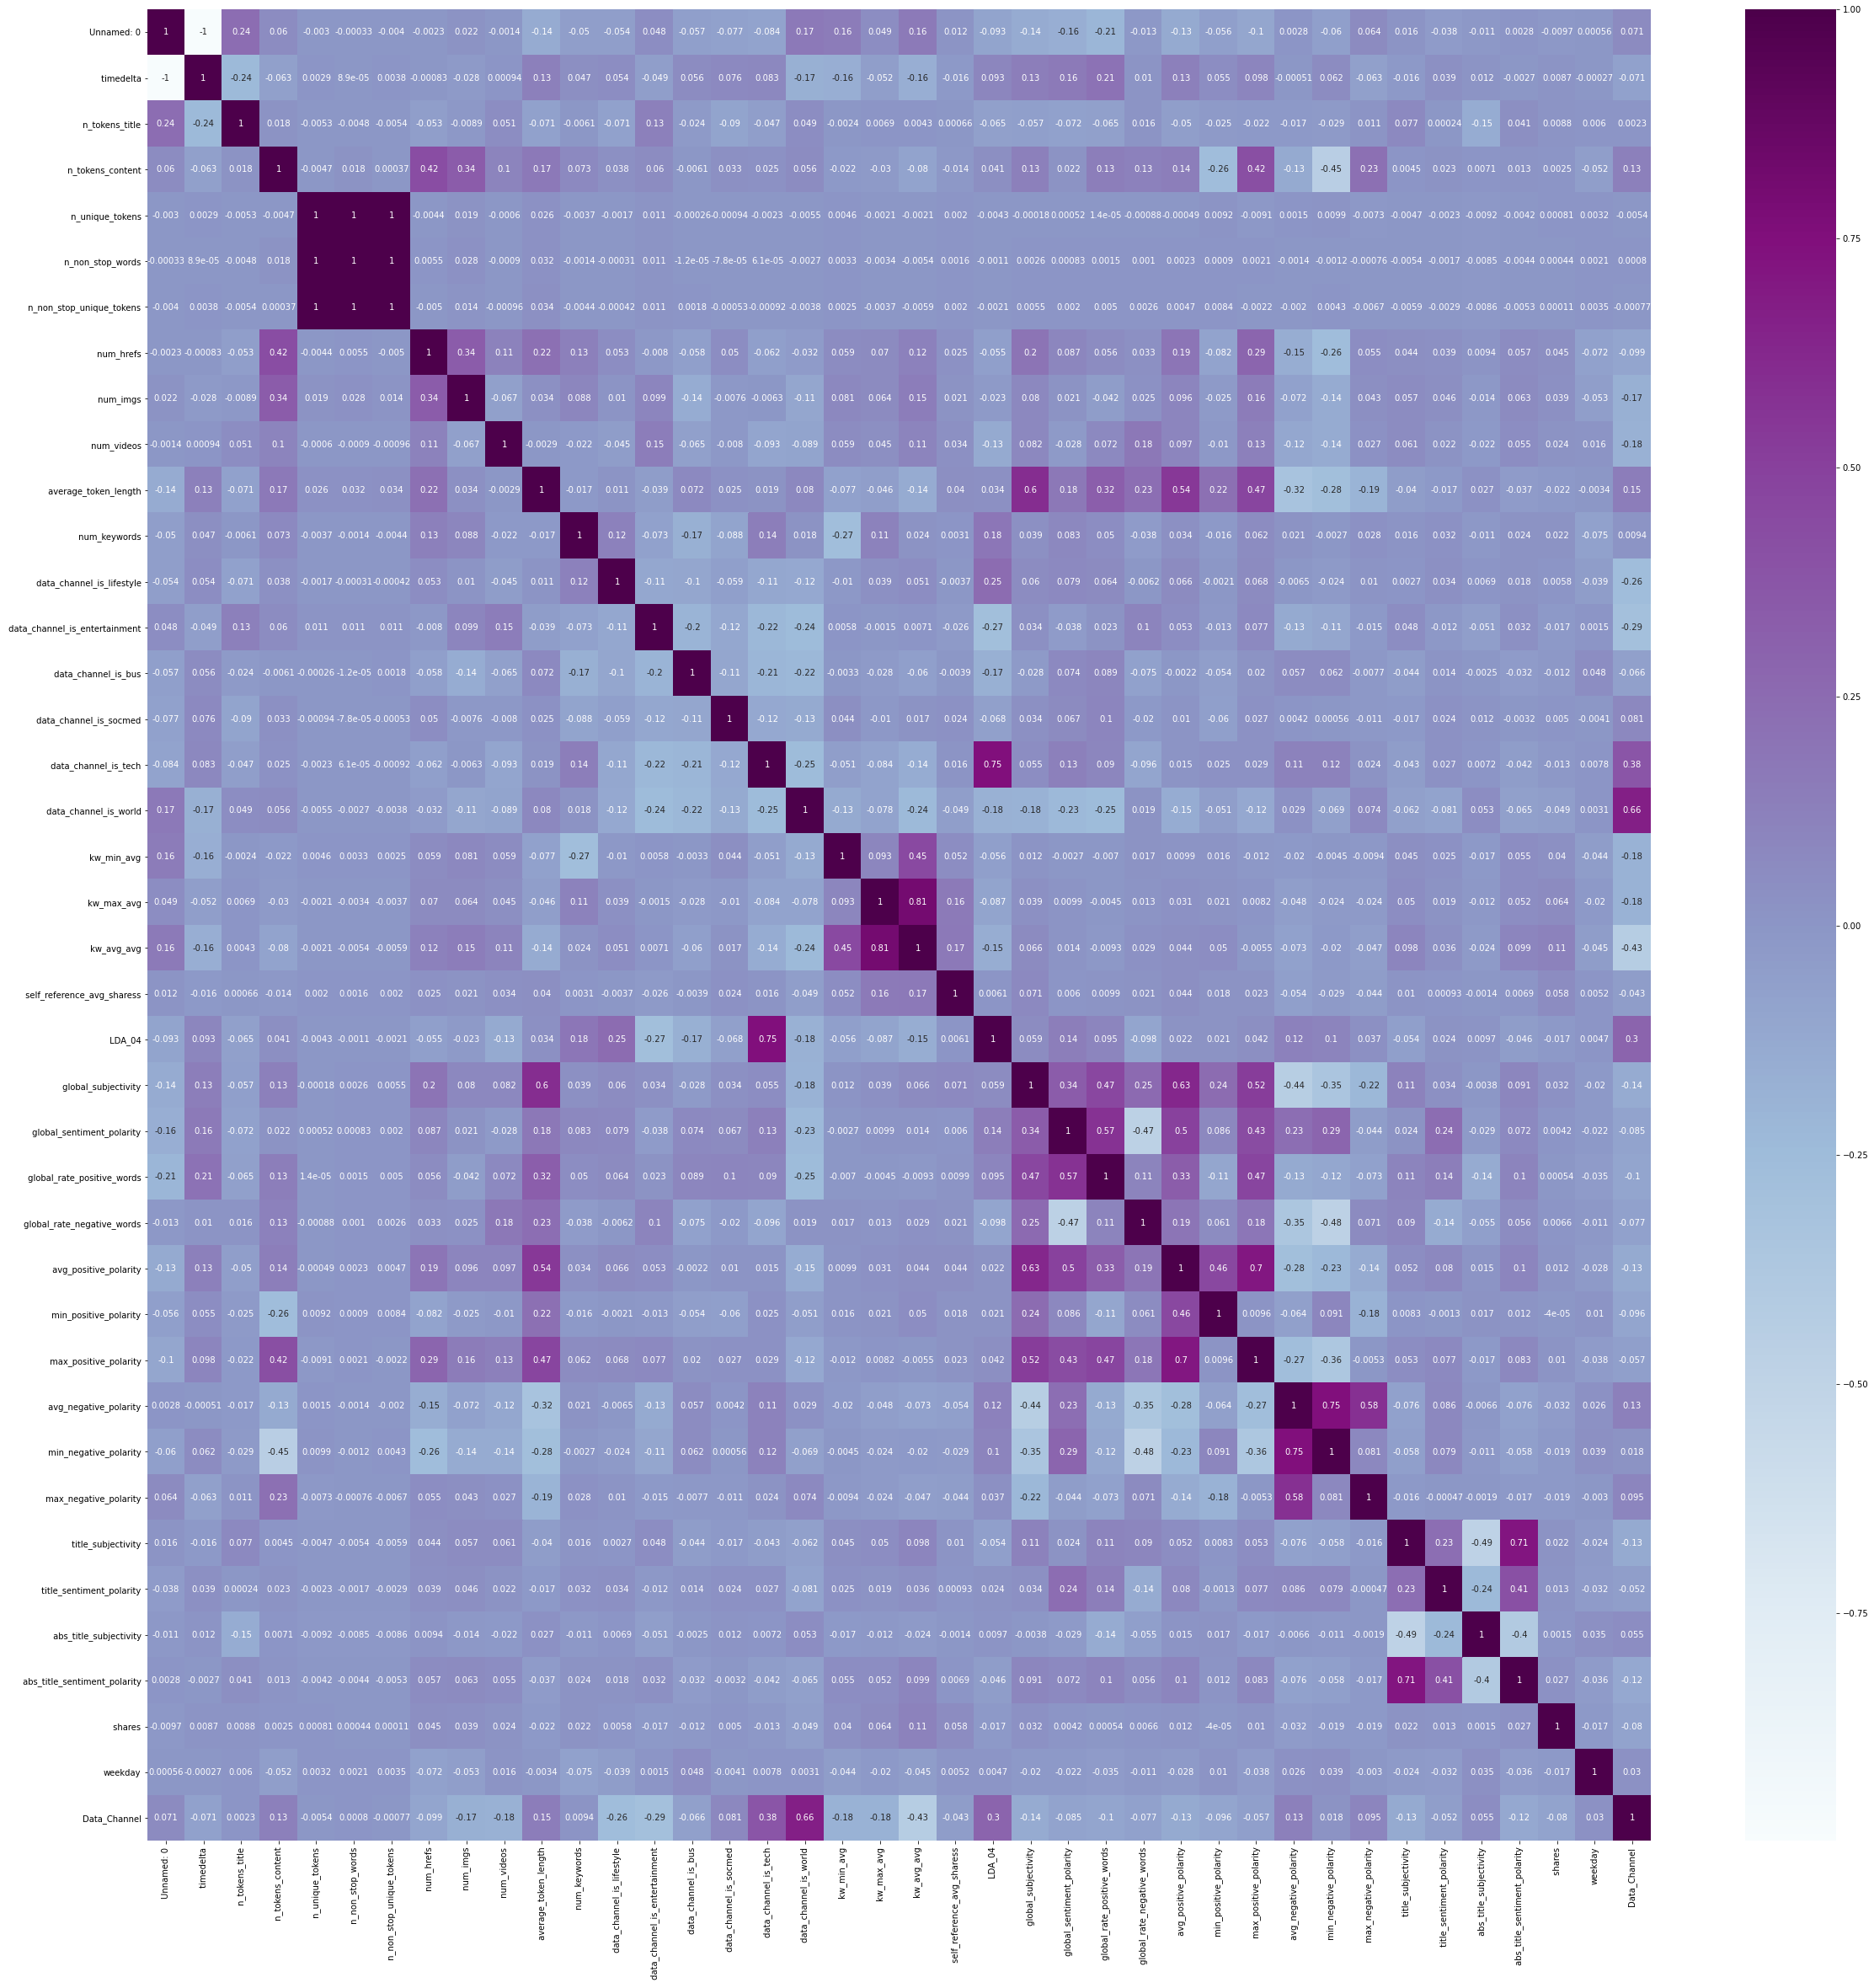

In [6]:
#correlation plot
plt.figure(figsize=(40,40))
sns.heatmap(data=df.corr(),annot=True,cmap='BuPu')

-  from the correlation graph, we can say that every feature is important

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


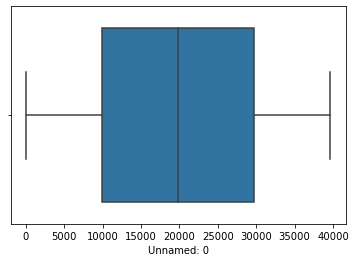

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


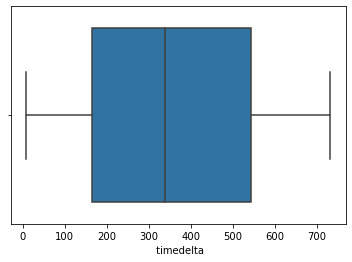

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


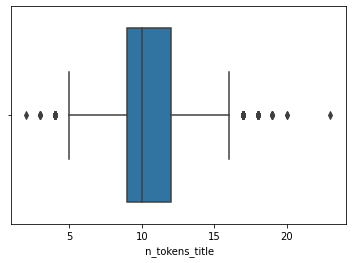

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


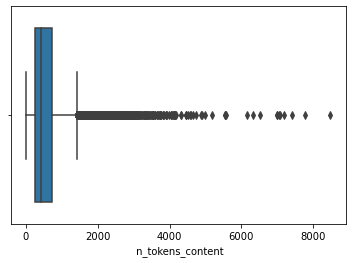

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


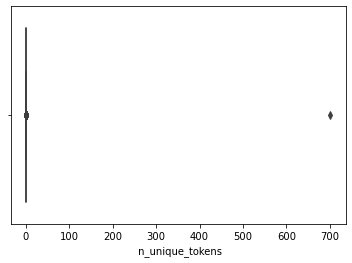

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


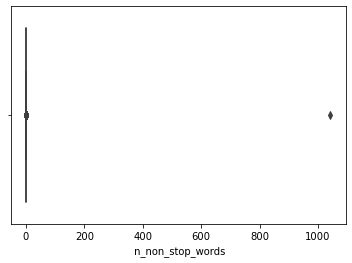

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


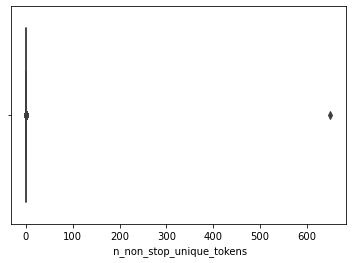

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


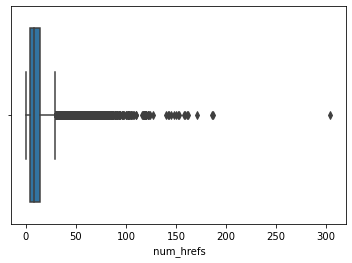

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


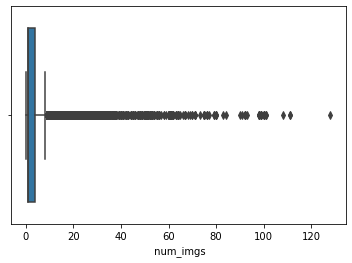

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


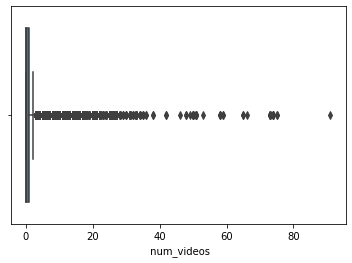

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


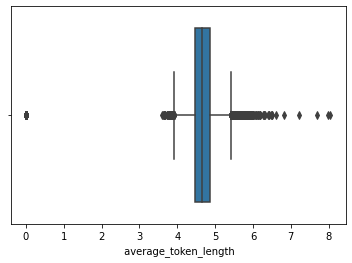

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


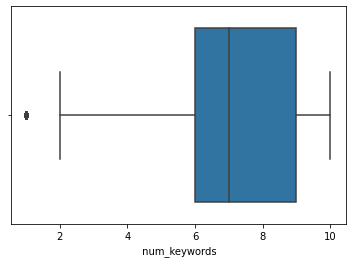

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


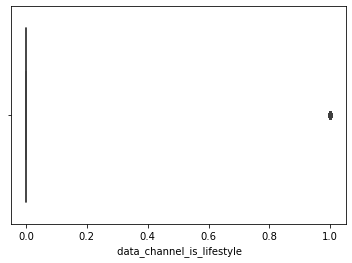

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


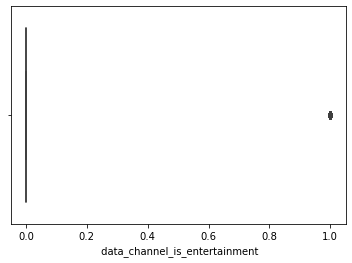

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


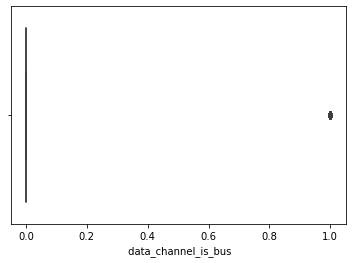

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


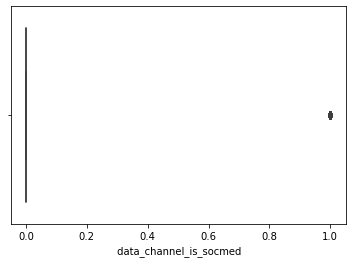

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


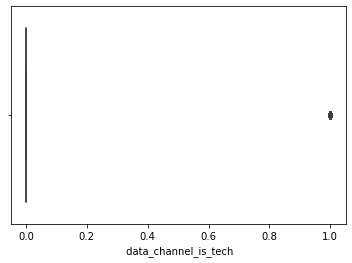

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


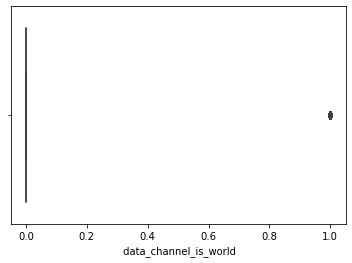

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


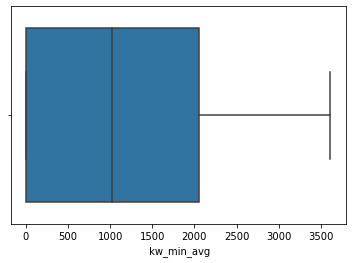

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


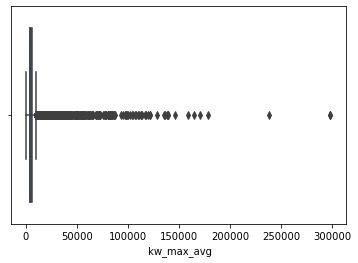

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


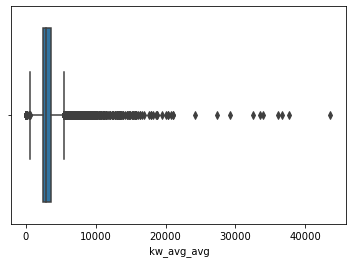

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


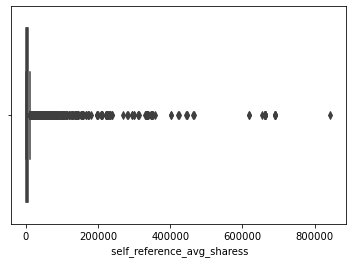

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


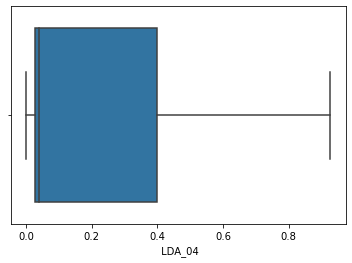

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


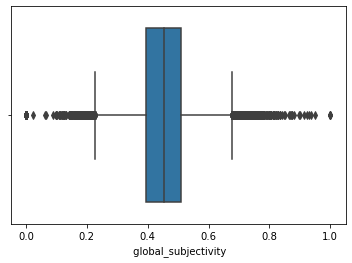

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


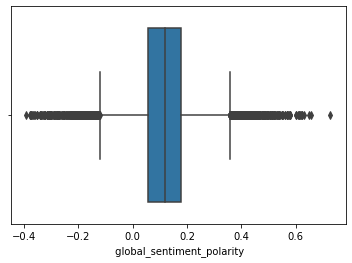

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


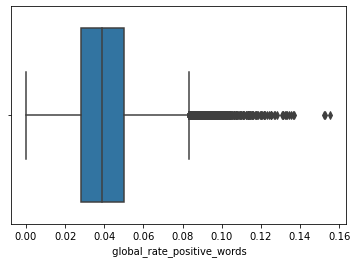

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


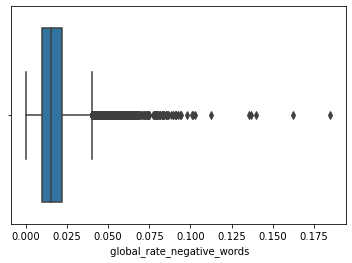

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


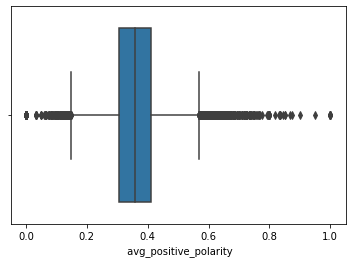

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


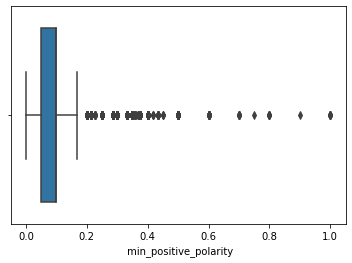

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


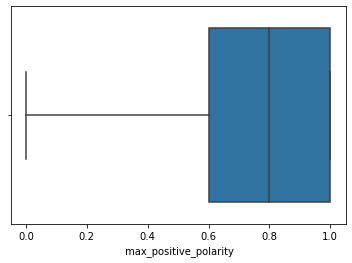

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


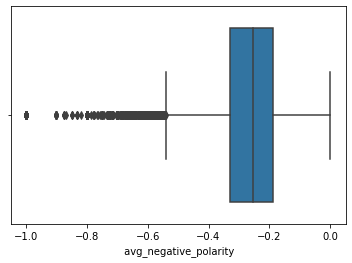

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


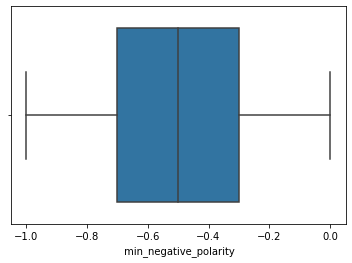

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


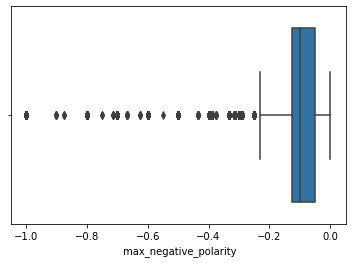

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


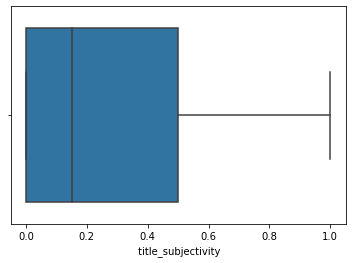

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


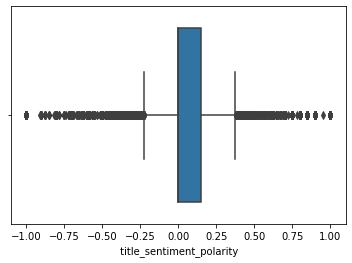

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


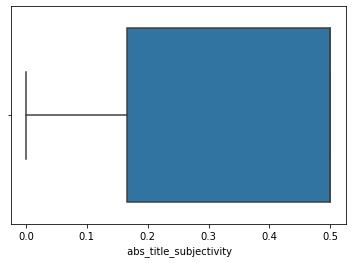

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


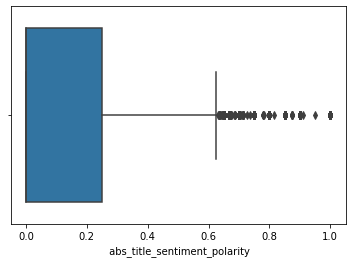

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


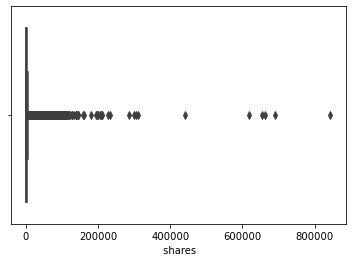

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


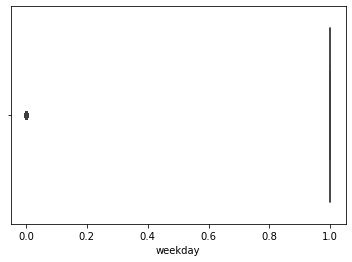

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


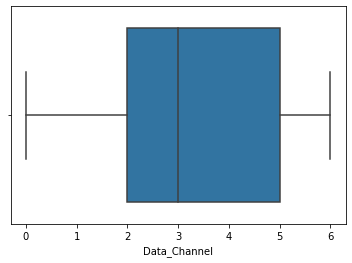

In [7]:
#box plot to check outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

there are many outliers in our dataset, the above box plot shows a lot of them
- we will drop the outliers later
- first we will see the logistic regression with outliers
- then we will train the model again without outliers

#### Histogram of the data

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc.
- in the following plot, each feature is shown with their distribution in the dataset

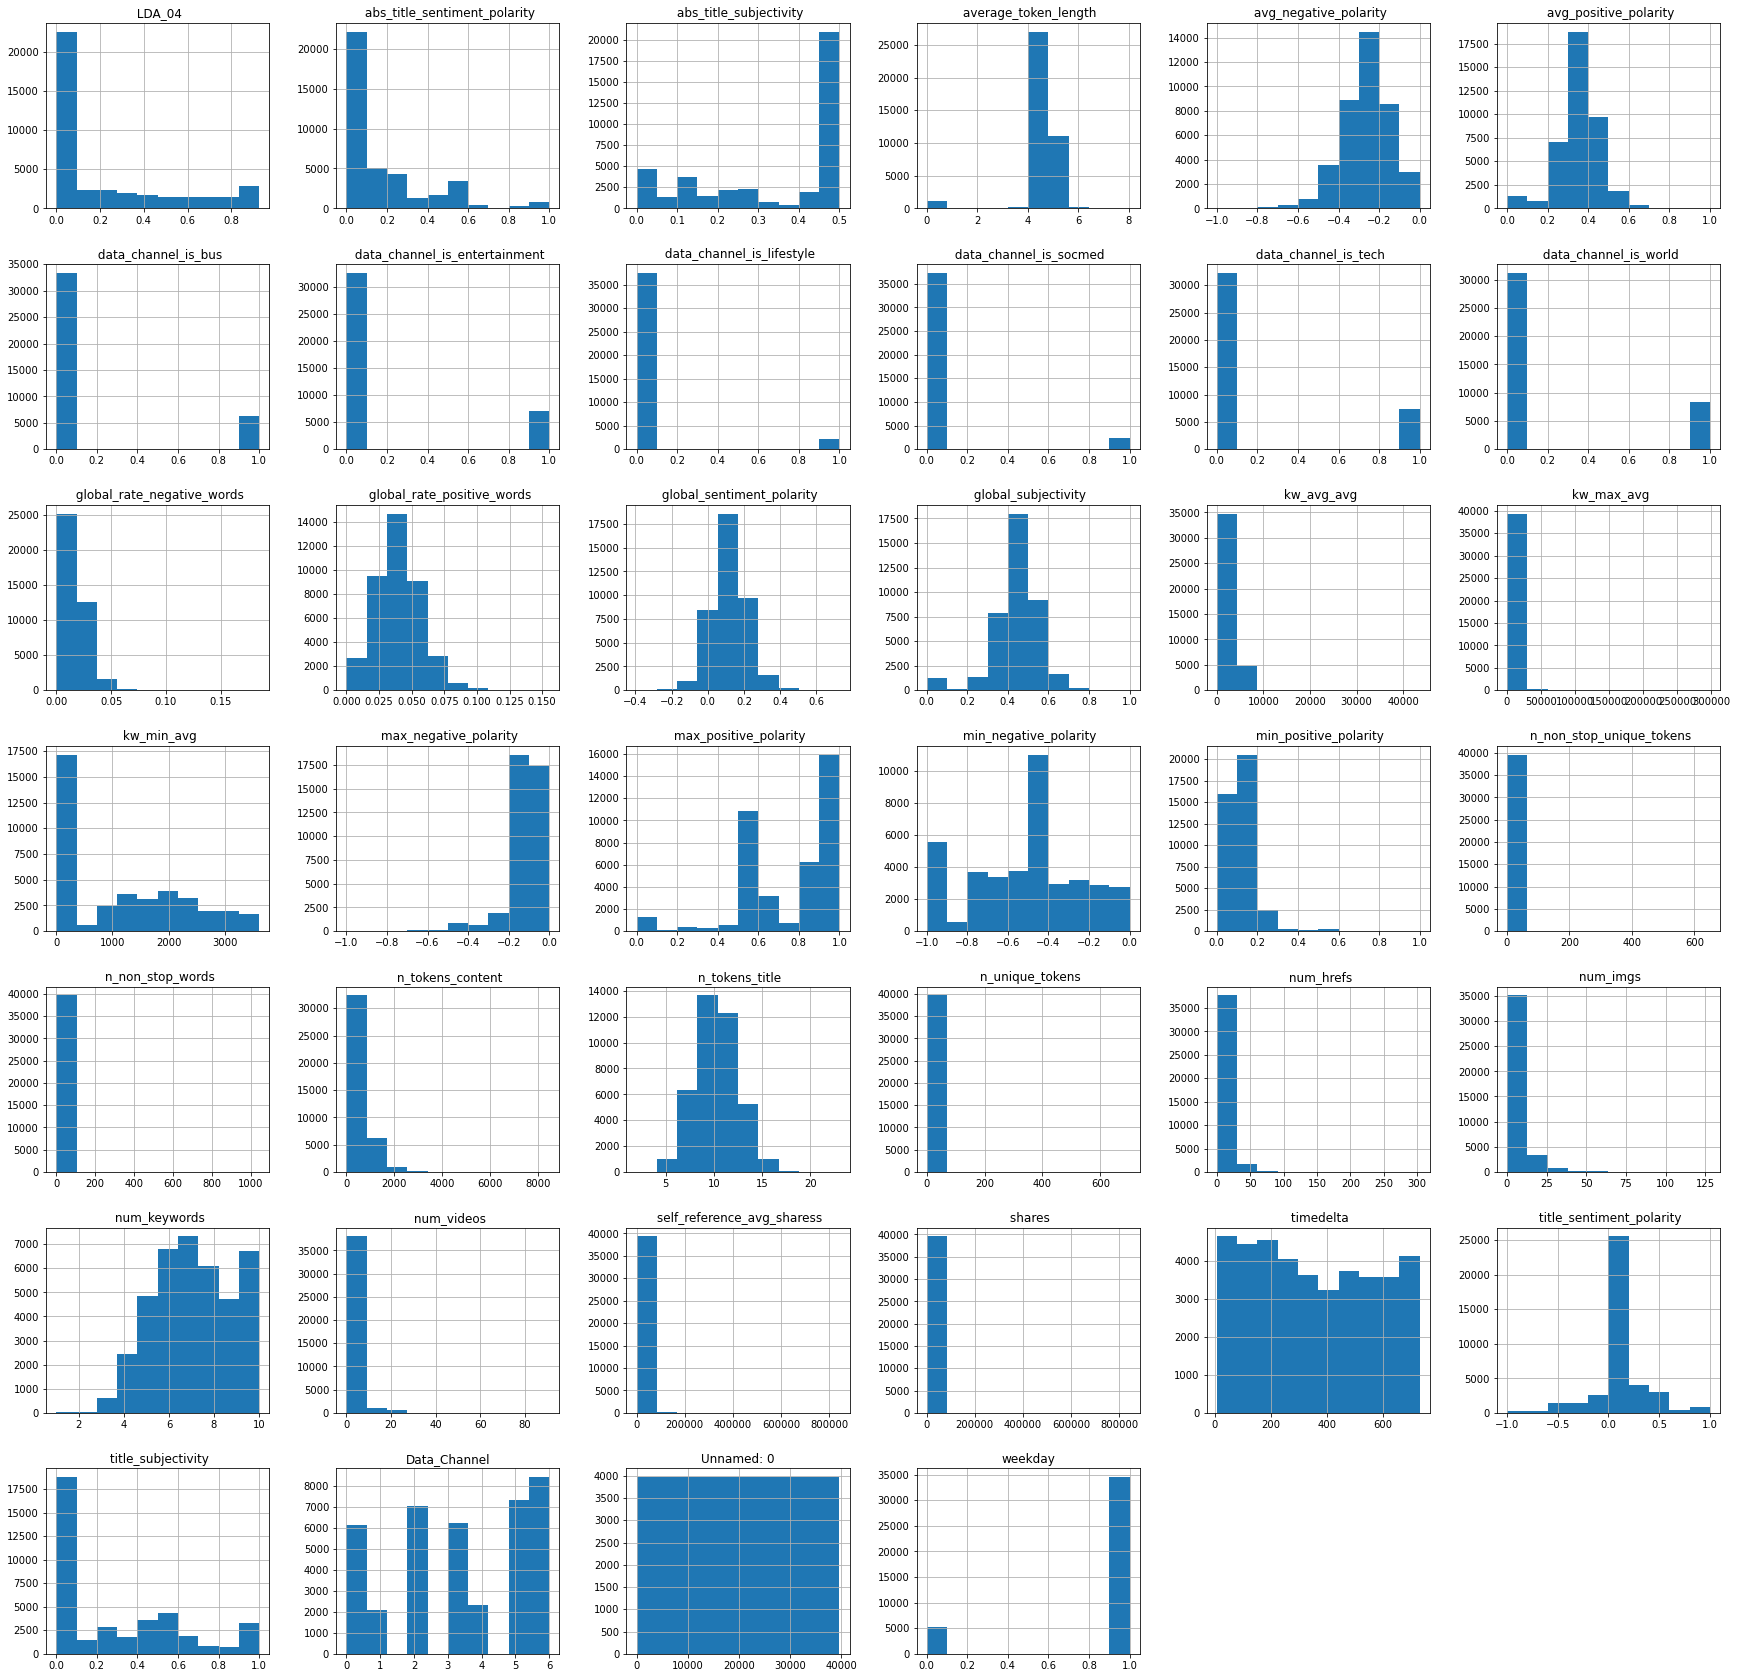

In [8]:
df.hist(figsize=(30,30))
plt.show()

Another thing we found out is that the data is not disctributed well, there si skewness etc.
- we will handle this too after training the first logistic regression model with it

Lets check the week days
- we will check how many articles are published each day of week
- also we will extract the mean and median of shares

In [9]:
#EDA
a,b = df[' shares'].mean(),df[' shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 3395.3801836343455
Median article share = 1400.0


In [10]:
Wd = df.columns.values[30:37]
Wd

array([' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity'], dtype=object)

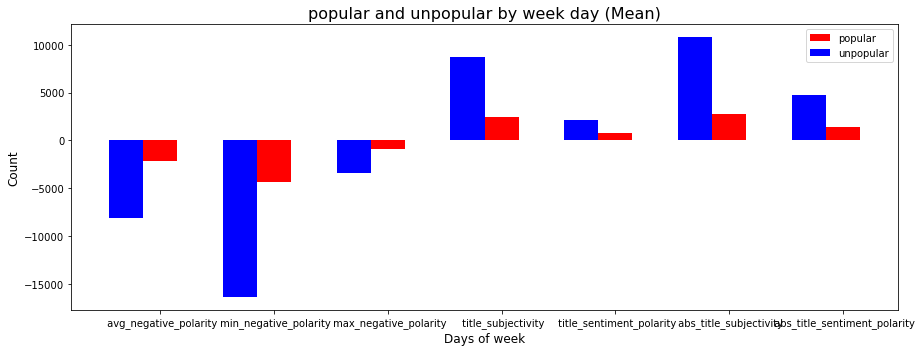

In [11]:
Unpop=df[df[' shares']<a]
Pop=df[df[' shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("popular and unpopular by week day (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

The above graph is the mean of shares
- Mean article shares = 3395.3801836343455
- Each day, number of articles are publish online, the above graph shows the popularity of articles based on the mean share
- lets check the popularity rate with respect to median of the shares

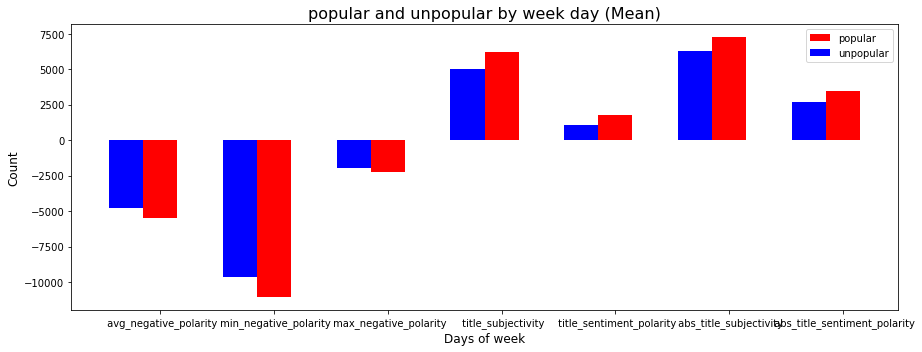

In [12]:
Unpop2=df[df[' shares']<b]
Pop2=df[df[' shares']>=b]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize = (13,5))
plt.title('popular and unpopular by week day (Mean)', fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day2, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [13]:
df.dropna(inplace = True)

lets convert the shares feature into 0 and 1, becasue we are training logistic regression which predict the results in 0 and 1
- we are taking mean of the shares

In [14]:
mean = df[' shares'].mean()

In [15]:
# than converting output columns to 0 and 1
df[' shares'] = df[' shares'].apply(lambda x: 0 if x <mean  else 1)

In [16]:
# lets check the values count of 0 and 1
df[' shares'].value_counts()

0    31565
1     8079
Name:  shares, dtype: int64

There is not proper distribution of 0 and 1
- we will scale the 0 and 1 using scaling and SMOTE

In [17]:
#Scaling and Doing SMOTE 
X = df.drop(' shares',axis=1)
y = df[' shares']

scaler=StandardScaler()
X=scaler.fit_transform(X)
from imblearn.over_sampling import SMOTE
SMOTE().fit_resample(X, y)
X,y = SMOTE().fit_resample(X, y)

#### splitting the data

-  we will split the data into test and train sets
- the train set will be used to train the model
- we will test the model on test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                         y, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [67]:
Logistic_Regression = LogisticRegression(multi_class='auto')
Logistic_Regression.fit(X_train,y_train)
lr1_pred = Logistic_Regression.predict(X_test)
lr1_pred

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [68]:
Logistic_Regression.score(X_test,y_test)

0.6277964759453574

In [70]:
# print("r2 score : ",r2_score(y_test,lr_pred))
# print("MSE : ",mean_squared_error(y_test,lr_pred))
# print("MAE : ",mean_absolute_error(y_test,lr_pred))

In [21]:
# making a datafram of the score
Logistic_uncleaned = pd.DataFrame(Logistic_Regression.score(X_test,y_test),columns=['score'], index = ['Logistic_Uncleaned'])
Logistic_uncleaned

,score
Logistic_Uncleaned,0.646998


Lets check some other models too
- the Gradient Boosting classifier
- Random Forest classifier

In [22]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

Gradient Boosting

In [23]:
Gradient = GradientBoostingRegressor(random_state=22, n_estimators = 142)
Gradient.fit(X_train,y_train)
Gradient.score(X_test,y_test)

0.5459399705143801

In [24]:
# making a datafram of the score
Gradient_uncleaned = pd.DataFrame(Gradient.score(X_test,y_test),columns=['score'], index = ['Gradient_Uncleaned'])
Gradient_uncleaned

,score
Gradient_Uncleaned,0.54594


In [71]:
gr = Gradient.predict(X_test)

In [72]:
print("r2 score : ",r2_score(y_test,gr))
print("MSE : ",mean_squared_error(y_test,gr))
print("MAE : ",mean_absolute_error(y_test,gr))

r2 score :  -1.2519197845931722
MSE :  0.5629788648780081
MAE :  0.5936366544107707


Random Forest

In [25]:
Random = RandomForestRegressor(random_state=150)
Random.fit(X_train,y_train)
Random.score(X_test,y_test)

0.5954126213488943

In [26]:
# making a datafram of the score
Random_uncleaned = pd.DataFrame(Random.score(X_test,y_test),columns=['score'], index = ['Random_Uncleaned'])
Random_uncleaned

,score
Random_Uncleaned,0.595413


In [73]:
rd = Random.predict(X_test)

In [74]:
print("r2 score : ",r2_score(y_test,rd))
print("MSE : ",mean_squared_error(y_test,rd))
print("MAE : ",mean_absolute_error(y_test,rd))

r2 score :  -0.7437327095697825
MSE :  0.4359323401306672
MAE :  0.4737052068897248


Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)#Accuracy

0.7813242515444321

In [28]:
# making a datafram of the score
Decision_uncleaned = pd.DataFrame(classifier.score(X_test,y_test),columns=['score'], index = ['Decision_Uncleaned'])
Decision_uncleaned

,score
Decision_Uncleaned,0.781324


In [75]:
dt = classifier.predict(X_test)

In [76]:
print("r2 score : ",r2_score(y_test,dt))
print("MSE : ",mean_squared_error(y_test,dt))
print("MAE : ",mean_absolute_error(y_test,dt))

r2 score :  -0.24609227646062148
MSE :  0.31152247079786183
MAE :  0.31152247079786183


# Part 2

The part 2 of this project is
- To clean the dataset from outliers
- train the Logistic Regression Model again
- Check the accuracy

In [29]:
# we will make a copy of the uncleaned dataset
data.head()

,Unnamed: 0,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,Data_Channel
0,0,731,12,219,0.663594,1.0,0.815385,4,1,0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1,2
1,1,731,9,255,0.604743,1.0,0.791946,3,1,0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1,3
2,2,731,9,211,0.575130,1.0,0.663866,3,1,0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,3
3,3,731,9,531,0.503788,1.0,0.665635,9,1,0,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1,2
4,4,731,13,1072,0.415646,1.0,0.540890,19,20,0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1,5


We saw previously that our dataset have many outliers
- we will remove the outliers from the dataset

We will use the IQR (Inter Quartil Range)
in this method
- values above 75% will be removed
- values below 25% will be removed

In [30]:
#removing outliers
Q1 = data.quantile(q=0.25) 

Q3 = data.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
Unnamed: 0                        1.982150e+04
 timedelta                        3.780000e+02
 n_tokens_title                   3.000000e+00
 n_tokens_content                 4.700000e+02
 n_unique_tokens                  1.378252e-01
 n_non_stop_words                 5.000000e-09
 n_non_stop_unique_tokens         1.288902e-01
 num_hrefs                        1.000000e+01
 num_imgs                         3.000000e+00
 num_videos                       1.000000e+00
 average_token_length             3.764347e-01
 num_keywords                     3.000000e+00
 data_channel_is_lifestyle        0.000000e+00
 data_channel_is_entertainment    0.000000e+00
 data_channel_is_bus              0.000000e+00
 data_channel_is_socmed           0.000000e+00
 data_channel_is_tech             0.000000e+00
 data_channel_is_world            0.000000e+00
 kw_min_avg                       2.056781e+03
 kw_max_avg                       2.457852e+03
 kw_avg_avg                       1.2

In [31]:
sorted_shares = data.sort_values(' shares') 

median = sorted_shares[' shares'].median() 

q1 = sorted_shares[' shares'].quantile(q=0.25) 

q3 = sorted_shares[' shares'].quantile(q=0.75) 

iqr = q3-q1

In [32]:
Inner_bound1 = q1-(iqr*1.5) 
print(f'Inner Boundary 1 = {Inner_bound1}')
Inner_bound2 = q3+(iqr*1.5)  
print(f'Inner Boundary 2 = {Inner_bound2}')
Outer_bound1 = q1-(iqr*3)    
print(f'Outer Boundary 1 = {Outer_bound1}')
Outer_bound2 = q3+(iqr*3)   
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1835.0
Inner Boundary 2 = 5581.0
Outer Boundary 1 = -4616.0
Outer Boundary 2 = 8362.0


In [33]:
dataCleand = data[data[' shares']<=Outer_bound2]

In [34]:
print(f'Data before Removing Outliers = {data.shape}')
print(f'Data after Removing Outliers = {dataCleand.shape}')
print(f'Number of Outliers = {data.shape[0] - dataCleand.shape[0]}')

Data before Removing Outliers = (39644, 40)
Data after Removing Outliers = (36879, 40)
Number of Outliers = 2765


In [35]:
# Saving the cleaned data into CSV
data.to_csv('Cleaned_Data.csv')

Now lets visualize again

In [36]:
a,b = dataCleand[' shares'].mean(),dataCleand[' shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 1916.4932888635808
Median article share = 1300.0


In [37]:
Wd = dataCleand.columns.values[30:37]

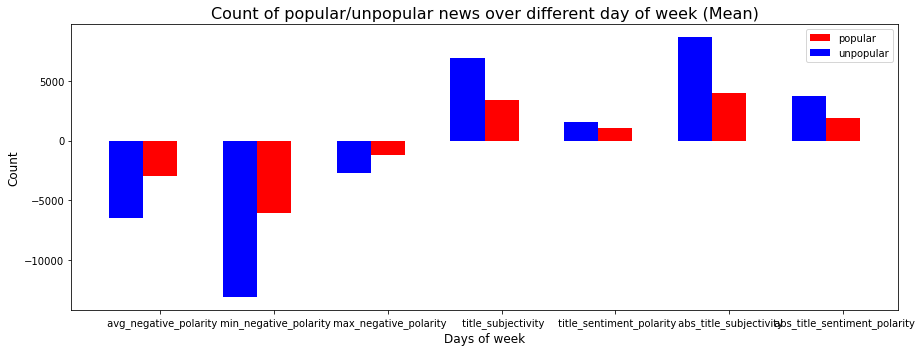

In [38]:
Unpop=dataCleand[dataCleand[' shares']<a]
Pop=dataCleand[dataCleand[' shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

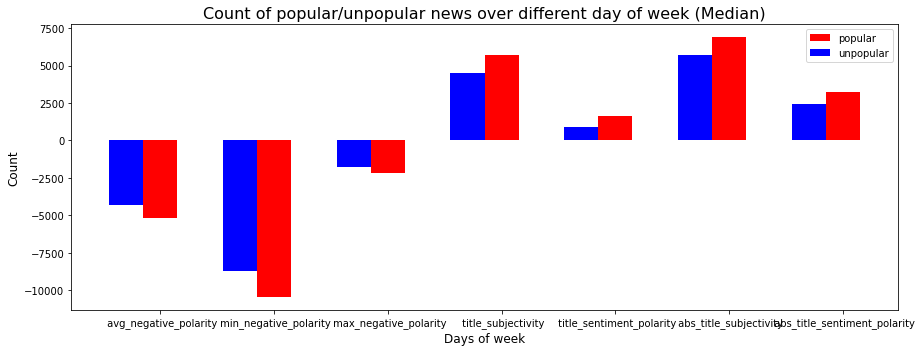

In [39]:
Unpop2=dataCleand[dataCleand[' shares']<b]
Pop2=dataCleand[dataCleand[' shares']>=b]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day2, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [40]:
Dc = dataCleand.columns.values[12:18]

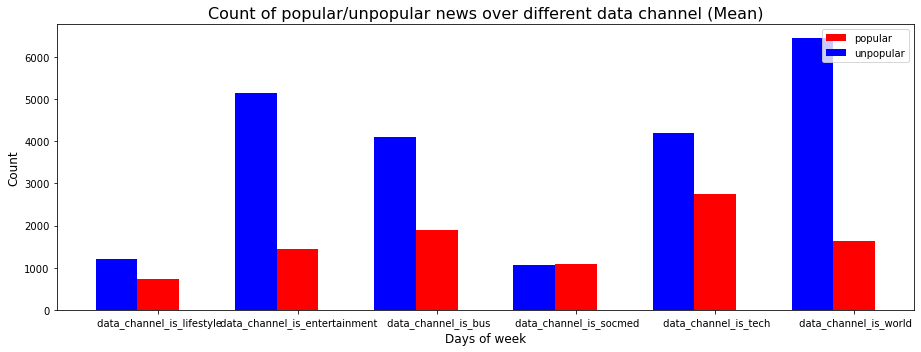

In [41]:
Unpop3=dataCleand[dataCleand[' shares']<a]
Pop3=dataCleand[dataCleand[' shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


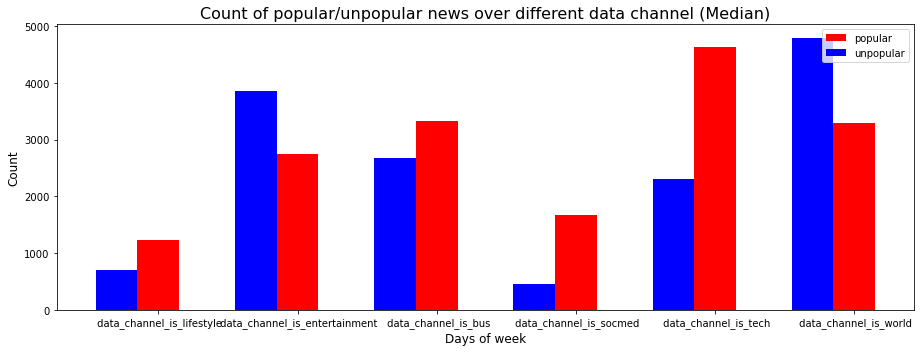

In [42]:
Unpop4=dataCleand[dataCleand[' shares']<b]
Pop4=dataCleand[dataCleand[' shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


Lets convert the shares feature to 0 and 1
- then we will rescale them again

In [43]:
mean = dataCleand[' shares'].mean()
#Converting output columns to 0 and 1
dataCleand[' shares'] = dataCleand[' shares'].apply(lambda x: 0 if x <mean  else 1)
dataCleand[' shares'].value_counts()

<ipython-input-43-9284dedb98cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleand[' shares'] = dataCleand[' shares'].apply(lambda x: 0 if x <mean  else 1)


0    25254
1    11625
Name:  shares, dtype: int64

In [44]:
#Scaling and Doing SMOTE 
X = dataCleand.drop(' shares',axis=1)
y = dataCleand[' shares']

scaler=StandardScaler()
X=scaler.fit_transform(X)
from imblearn.over_sampling import SMOTE
SMOTE().fit_resample(X, y)
X,y = SMOTE().fit_resample(X, y)

#### split the data

we will again split the data into test and train sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                         y, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [46]:
Logistic_Regression_cleaned = LogisticRegression(multi_class='auto')
Logistic_Regression_cleaned.fit(X_train,y_train)
lr_pred_clean = Logistic_Regression_cleaned.predict(X_test)
lr_pred_clean

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [47]:
Logistic_Regression_cleaned.score(X_test,y_test)

0.6277964759453574

In [48]:
# making a datafram of the score
Logistic_cleaned = pd.DataFrame(Logistic_Regression_cleaned.score(X_test,y_test),columns=['score'], index = ['Logistic_cleaned'])
Logistic_cleaned

,score
Logistic_cleaned,0.627796


In [77]:
print("r2 score : ",r2_score(y_test,lr_pred_clean))
print("MSE : ",mean_squared_error(y_test,lr_pred_clean))
print("MAE : ",mean_absolute_error(y_test,lr_pred_clean))

r2 score :  -0.48881695566950656
MSE :  0.37220352405464263
MAE :  0.37220352405464263


Gradient Boosting

In [49]:
Gradient_cleaned = GradientBoostingRegressor(random_state=22, n_estimators = 142)
Gradient_cleaned.fit(X_train,y_train)
Gradient_cleaned.score(X_test,y_test)

0.37420505270978255

In [78]:
Gradient_cleanedd = pd.DataFrame(Gradient_cleaned.score(X_test,y_test),columns=['score'], index = ['Gradient_cleaned'])
Gradient_cleanedd

,score
Gradient_cleaned,0.374205


In [79]:
gclean = Gradient_cleaned.predict(X_test)

In [80]:
print("r2 score : ",r2_score(y_test,gclean))
print("MSE : ",mean_squared_error(y_test,gclean))
print("MAE : ",mean_absolute_error(y_test,gclean))

r2 score :  0.37420505270978255
MSE :  0.15644843634405348
MAE :  0.3435699211548711


Random Forest

In [89]:
Random_cleaned = RandomForestRegressor(random_state=150)
Random_cleaned.fit(X_train,y_train)
Random_cleaned.score(X_test,y_test)

0.39548994963733963

In [90]:
rclean = Random_cleaned.predict(X_test)

In [91]:
print("r2 score : ",r2_score(y_test,rclean))
print("MSE : ",mean_squared_error(y_test,rclean))
print("MAE : ",mean_absolute_error(y_test,rclean))

r2 score :  0.39548994963733963
MSE :  0.15112722233221146
MAE :  0.3342031280934468


In [92]:
Random_cleaned = pd.DataFrame(Random_cleaned.score(X_test,y_test),columns=['score'], index = ['Random_cleaned'])
Random_cleaned

,score
Random_cleaned,0.39549


Decision Tree

In [53]:
classifier_cleaned = DecisionTreeClassifier()
classifier_cleaned = classifier.fit(X_train,y_train)
classifier_cleaned.score(X_test,y_test)#Accuracy

0.6884775292021382

In [54]:
# making a datafram of the score
Tree_cleaned = pd.DataFrame(classifier_cleaned.score(X_test,y_test),columns=['score'], index = ['Tree_cleaned'])
Tree_cleaned

,score
Tree_cleaned,0.688478


In [85]:
dclean = classifier_cleaned.predict(X_test)

In [88]:
print("r2 score : ",r2_score(y_test,dclean))
print("MSE : ",mean_squared_error(y_test,dclean))
print("MAE : ",mean_absolute_error(y_test,dclean))

r2 score :  -0.24609227646062148
MSE :  0.31152247079786183
MAE :  0.31152247079786183



- we will compare logistic regression before and after outliers removal

# Comparison

In [93]:
results  = pd.concat([Logistic_uncleaned, Logistic_cleaned,Random_uncleaned,Random_cleaned,Decision_uncleaned,Tree_cleaned], axis=0)
results 

,score
Logistic_Uncleaned,0.646998
Logistic_cleaned,0.627796
Random_Uncleaned,0.595413
Random_cleaned,0.395490
Decision_Uncleaned,0.781324
Tree_cleaned,0.688478


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Logistic_Uncleaned'),
  Text(1, 0, 'Logistic_cleaned'),
  Text(2, 0, 'Random_Uncleaned'),
  Text(3, 0, 'Random_cleaned'),
  Text(4, 0, 'Decision_Uncleaned'),
  Text(5, 0, 'Tree_cleaned')])

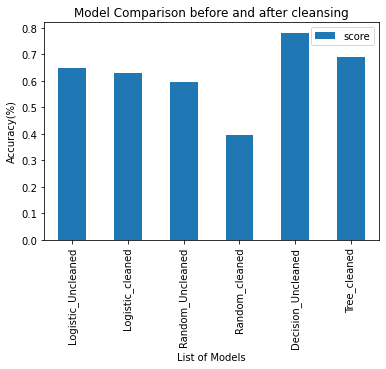

In [94]:
results.plot.bar()
plt.title('Model Comparison before and after cleansing')
plt.xlabel('List of Models')
plt.ylabel('Accuracy(%)')
plt.xticks(rotation = 90)